## Mounting to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/midas"

/content/drive/MyDrive/midas


## Importing Libraries

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/midas/flipkart_com-ecommerce_sample.csv')

In [ ]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


## Understanding the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
data.shape

(20000, 15)

In [ ]:
data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    20000
dtype: int64

## Data Cleaning

In [ ]:
data['crawl_timestamp']=pd.to_datetime(Flipkart_data['crawl_timestamp'])
data['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

In [ ]:
data['crawl_year']=data['crawl_timestamp'].apply(lambda x : x.year)

In [ ]:
data['crawl_year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
19995    2015
19996    2015
19997    2015
19998    2015
19999    2015
Name: crawl_year, Length: 20000, dtype: int64

In [ ]:
data['Month']=data['crawl_timestamp'].apply(lambda x : x.month)
data['Month']

0         3
1         3
2         3
3         3
4         3
         ..
19995    12
19996    12
19997    12
19998    12
19999    12
Name: Month, Length: 20000, dtype: int64

#### Splitting the categories

In [ ]:
data['first']=data['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])

def second(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'   
data['second']=data['product_category_tree'].apply(second)

def Third(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
data['Third']=data['product_category_tree'].apply(Third)

def Fourth(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'
data['Fourth']=data['product_category_tree'].apply(Fourth)

def Fifth(value):
    try:
        return value.split('>>')[4][1:len(value.split('>>')[4])-1]
    except IndexError:
        return 'None'
data['Fifth']=data['product_category_tree'].apply(Fifth)

def Six(value):
    try:
        return value.split('>>')[5][1:len(value.split('>>')[5])-1]
    except IndexError:
        return 'None'
data['Six']=data['product_category_tree'].apply(Six)

## Data after cleaning

In [ ]:
data.head(n=5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,first,second,Third,Fourth,Fifth,Six
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts"""
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""",None,None
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts"""
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""",None


## Dataset Analysis

<Figure size 10800x720 with 0 Axes>

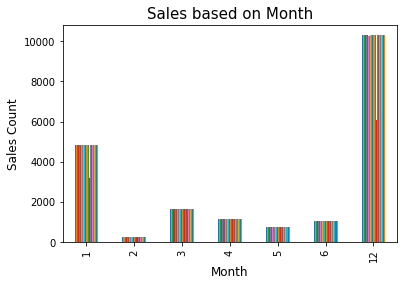

In [ ]:
plt.figure(figsize=(150,10))
temp=data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.title('Sales based on Month',fontsize=15)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()

Most number of sales are in December month

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

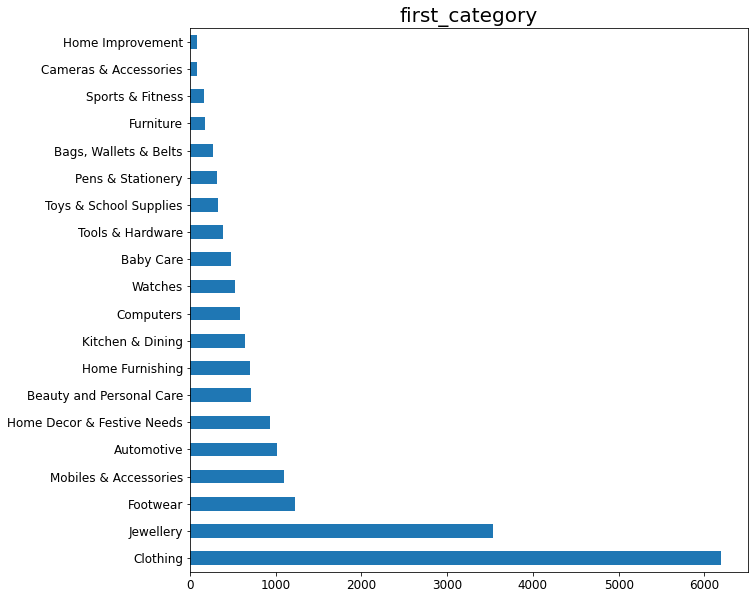

In [ ]:
plt.figure(figsize=(10,10))
data['first'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.title('first_category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]), <a list of 10 Text major ticklabel objects>)

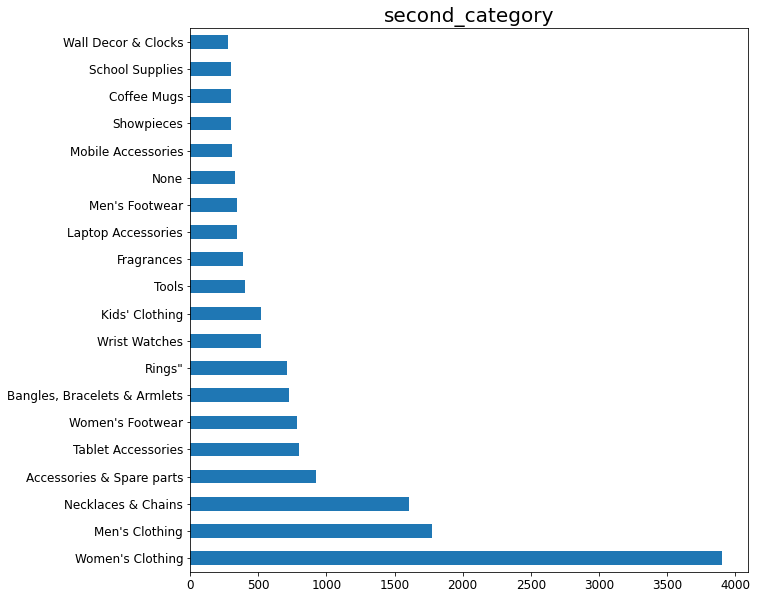

In [ ]:
plt.figure(figsize=(10,10))
data['second'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.title('second_category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text major ticklabel objects>)

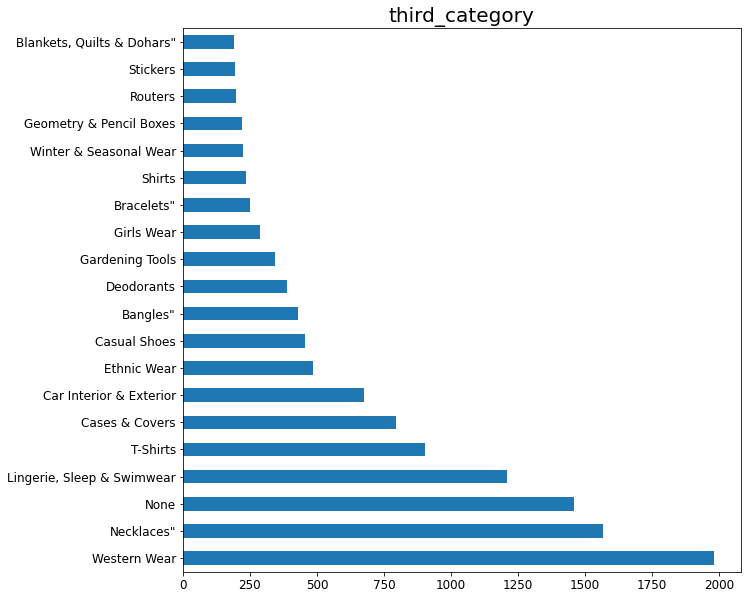

In [ ]:
plt.figure(figsize=(10,10))
data['Third'].value_counts()[:20].plot(kind='barh')
plt.title('third_category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

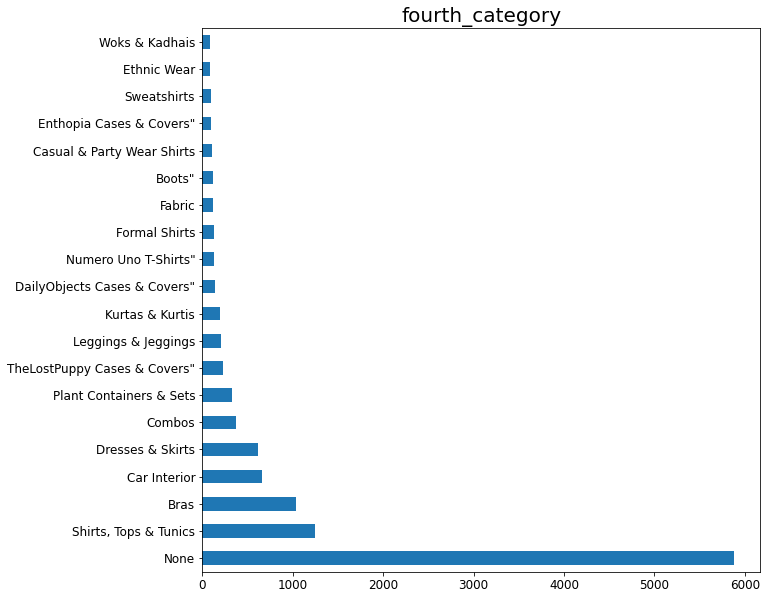

In [ ]:
plt.figure(figsize=(10,10))
data['Fourth'].value_counts()[:20].plot(kind='barh')
plt.title('fourth_category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

### With these plots we can analyse that

1.   The 12th month has most number of sale.
2.   Most of the sale took place in the clothing section, and secondary category is Women's clothing looks like Western wear




## Figuring out the primary category

In [ ]:
firstcat = len(data[data['first']=='None'])
secondcat = len(data[data['second']=='None'])
Thirdcat = len(data[data['Third']=='None'])
Fourthcat = len(data[data['Fourth']=='None'])
Fifthcat = len(data[data['Fifth']=='None'])
Sixcat = len(data[data['Six']=='None'])

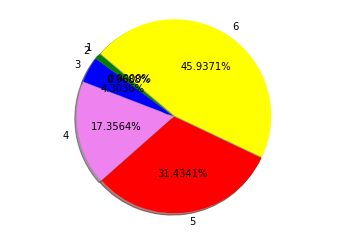

In [ ]:
labels = '1', '2', '3', '4','5','6'
sizes = [firstcat,secondcat ,Thirdcat,Fourthcat,Fifthcat, Sixcat]
colors = ['pink', 'green', 'blue', 'violet','red','yellow']
explode = (0.01, 0.01, 0.01, 0.01,0.0,0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 140)
plt.axis('equal')
plt.show()

We can see that 4,5,6 has more null values so taking any 4,5,6 as primary will result into data loss and 1 has the least number of null values so i am takng that as the primary category

## Data Preprocessing

In [ ]:
import re 
import nltk 
from sklearn import preprocessing


from gensim.models.fasttext import FastText
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = WordNetLemmatizer()
def preprocess(text):
    text = re.sub(r'\W', ' ', str(text)) 
    text=re.sub('[^a-z\s]+',' ',text,flags=re.IGNORECASE) 
    text=re.sub('(\s+)',' ',text) 
    text=text.lower()
    tokens = text.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in en_stop] 
    tokens = [word for word in tokens if len(word) > 2] 
    preprocessed = ' '.join(tokens)  
    return preprocessed 

## Model
As the task is to predict the category using description , I am avoiding other columns and using only the description and maincategory column(primary category)

In [ ]:
fdf = data[['description', 'first']]

In [ ]:
fdf['description'] = fdf['description'].astype('str').apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fdf

,description,first
0,key feature alisha solid woman cycling short c...,Clothing
1,fabhomedecor fabric double sofa bed finish col...,Furniture
2,key feature belly sandal wedge heel casuals be...,Footwear
3,key feature alisha solid woman cycling short c...,Clothing
4,specification sicons purpose arnica dog shampo...,Pet Supplies
...,...,...
19995,buy walldesign small vinyl sticker online wall...,Baby Care
19996,buy wallmantra large vinyl sticker sticker onl...,Baby Care
19997,buy elite collection medium acrylic sticker on...,Baby Care
19998,buy elite collection medium acrylic sticker on...,Baby Care


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(stop_words='english')
tf = TfidfTransformer()

In [ ]:
X = cv.fit_transform(fdf.description.values)

In [ ]:
X = tf.fit_transform(X)
y = fdf['first'].values

### Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### 1. Navies Bayes

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.8833333333333333

In [ ]:
classifier.score(X_test, y_test)

0.8548

### 2. GridSearchCV

In [ ]:
param_grid = {'alpha':np.linspace(0, 1, 10), 'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=4)

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/pytho

GridSearchCV(cv=4, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9496

### 3. Decision Tree

In [ ]:
dclf = DecisionTreeClassifier()
dclf.fit(X_train,y_train)
dprediction = dclf.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(dprediction, y_test))

The accuracy of Decision Tree is:  0.9328


### 4. Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(lrprediction, y_test))

The accuracy of Logistic Regression is:  0.9408


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5.KNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f337c9c9790>,
 <a list of 10 Text major ticklabel objects>)

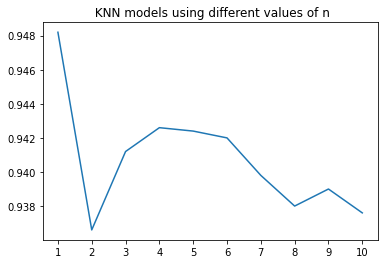

In [ ]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.title(' KNN models using different values of n')
plt.xticks(x)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
kprediction = knn.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(kprediction, y_test))

The accuracy of KNN is:  0.9426


### 6. Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
random_pred=clf.predict(X_test)
print('The accuracy of Random forest is: ', metrics.accuracy_score(random_pred, y_test))

The accuracy of Random forest is:  0.944


## GridSearchCv gave the best accuracy nearly 95%